   # Post-Double-Selection Procedure

Author: [Anthony Strittmatter](https://www.anthonystrittmatter.com/)

The Job Corps is the largest U.S. labor market program targeting disadvantaged youths. It  provides  academic, vocational, and  social training, as well as health care counseling and job search assistance, for an average duration of eight to nine months. Mathematica Policy Research carried out a randomized experiment with the Job Corps. About 60% of the experimental participants were randomly selected to receive an offer to participatein the Job Corps. Out of these, 73% joined the Job Corps program and actually started to participate after an average duration of 1.4 months. The remaining experimental 
participants were assigned to the control group. Control group members were not eligible for the Job Corps programs for three years following randomization (approximately 1% participated anyway).

We estimate the effects of actually participating in the Job Corps on earnings fours years after the randomization. The experimental Job Corps data job_corps.csv contains 10'516 observations.

**Variable list :** 

* **EARNY4**: Earnings per week in Year 4
* **assignment**: Dummy for randomized offer to join Job Corps
* **participation**: Dummy for actual participation in Job Corps
* **female**: Dummy for females
* **age1**: Aged between 16-17 years
* **age2**: Aged between 18-19 years
* **age3**: Aged between 20-24 years
* **ed_06**: 0-6 months education program in last year prior experiment
* **ed_612**: 6-12 months education program in last year pror experiment
* **hs_ged**: High school or GED credential (general educational development test)
* **white**: Dummy for white ethnicity
* **black**: Dummy for African-American ethnicity
* **hisp**: Dummy for Hispanic ethnicity
* **oth_eth**: Dummy for other ethnicity
* **haschld**: Dummy for parents
* **livespou**: Lives with spouse or partner
* **everwork**: Ever had job for two weeks or more
* **yr_work**: Worked in year prior to random assignment
* **currjob**: Has job at random assignment
* **job0_3**: Below 3 months employed in last year
* **job3_9**: 3-9 months employed in last year
* **job9_12**: 9-12 months employed in last year
* **earn1**: Yearly earnings less than \$1'000 prior experiment 
* **earn2**: Yearly earnings \$1'000-5'000 prior experiment 
* **earn3**: Yearly earnings \$5'000-10'000 prior experiment 
* **earn4**: Yearly earnings above \$10'000 prior experiment 
* **badhlth**: Dummy for bad health
* **welf_kid**: Family on welfare when growing up
* **got_fs**: Received food stamps in last year
* **publich**: Public or rent-subsidized housing
* **got_afdc**: Received AFDC (aid for families with dependent children) in last year
* **harduse**: Used hard drugs in last year
* **potuse**: Smoked marijuana in last year
* **evarrst**: Ever arrested dummy
* **pmsa**: Lives in PMSA (primary metropolitan statistical area)
* **msa**: Lives in MSA (metropolitan statistical area)

Load the data "job_corps.csv". If not already installed, install the packages *hdm*, *glmnet*, *tidyverse*, *caret*, *lmtest*, *sandwich*, and *fBasics*.

Draw a random subsample of 3'000 observations. We need a smaller data set in this tutorial, because otherwise the computation time on the server would be too long. In reality you would use the entire data.
 

# Load Packages and the Data

In [1]:
##############################################################################
########################  Load Packages and the Data  ########################
##############################################################################

### Load the packages  
library(fBasics)     # use for descriptive statistics
library(tidyverse)   # use for handling data
library(caret)       # use for handling data
library(lmtest)      # use for heteroscedasticity robust standard errors
library(sandwich)    # use for heteroscedasticity robust standard errors
library(hdm)         # use for Lasso and Post-Double-Selection
library(glmnet)      # use for lasso and Elastic Net regularized Generalized Linear Models
options(warn=-1)     # supress warnings

print('All packages successfully installed and loaded.')

### Load the Data
set.seed(12345678) 
df <- read.csv("job_corps.csv",header=TRUE, sep=",") # load data from csv-file
df <- df[sample(c(1:nrow(df)), size=3000, replace =F),] # Select a random subsample of 3000 observations
print('Data successfully loaded.')

##############################################################################

Warning message:
"package 'fBasics' was built under R version 3.6.3"Loading required package: timeDate
Loading required package: timeSeries
Warning message:
"package 'timeSeries' was built under R version 3.6.3"Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks timeSeries::filter(), stats::filter()
x dplyr::lag()    

[1] "All packages successfully installed and loaded."
[1] "Data successfully loaded."


# Descriptive Statistics

In [2]:
##############################################################################
########################  Descriptive Statistics  ############################
##############################################################################

## Table with Descriptive Statistics 
desc <- fBasics::basicStats(df) %>% t() %>% as.data.frame() %>% 
          select(Mean, Stdev, Minimum, Maximum, nobs)
print(round(desc, digits=2))

##############################################################################

                Mean  Stdev Minimum Maximum nobs
EARNY4        207.42 205.42       0 2357.74 3000
assignment      0.60   0.49       0    1.00 3000
participation   0.44   0.50       0    1.00 3000
female          0.43   0.49       0    1.00 3000
age_1           0.41   0.49       0    1.00 3000
age_2           0.32   0.46       0    1.00 3000
age_3           0.28   0.45       0    1.00 3000
ed0_6           0.26   0.44       0    1.00 3000
ed6_12          0.37   0.48       0    1.00 3000
hs_ged          0.25   0.43       0    1.00 3000
white           0.26   0.44       0    1.00 3000
black           0.49   0.50       0    1.00 3000
hisp            0.17   0.38       0    1.00 3000
oth_eth         0.07   0.26       0    1.00 3000
haschld         0.21   0.40       0    1.00 3000
livespou        0.07   0.25       0    1.00 3000
everwork        0.80   0.40       0    1.00 3000
yr_work         0.64   0.48       0    1.00 3000
currjob         0.20   0.40       0    1.00 3000
job0_3          0.22

There are no missings (see last column *nobs*). All variables (excluding earnings) are binary dummies.

# Univariate OLS Regression

We want to estimate the causal effect of participation in Job Corps on earnings. For this purpose, we estimate the univariate linear regression model,

\begin{equation*}
EARNY4 = \gamma + \delta \cdot participation +u.
\end{equation*}

**Questions:**

1. How large is the effect of participation in Job Corps on earnings?
2. What is the main assumtpion we have to make to interprete this effect in a causal way?
3. How credible is the identifying assumption in this application?
4. Can we improve the credibility of the identification strategy using observable exogeneous charactersitics $X$?

In [3]:
#########################################################################
########################  Univariate OLS Regression #####################
#########################################################################

## Univariate OLS
ols1 <- lm(EARNY4 ~ participation, data = df)
summary(ols1)

## Store results
results <- as.matrix(coef(summary(ols1))[2, c("Estimate", "Std. Error", "Pr(>|t|)")])

# Prepare matrix to store results
res <- matrix(NA,nrow=3,ncol=5)
colnames(res) <- c("Univariate OLS", "Multivariate OLS1", "Multivariate OLS2",
                   "Multivariate OLS3", "Multivariate OLS4")
rownames(res) <- rownames(results)
res[,1] <- results

print(round(res[,1], digits=2))

########################################################################


Call:
lm(formula = EARNY4 ~ participation, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-214.40 -175.29  -26.27   98.82 2155.83 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    201.904      5.018  40.239   <2e-16 ***
participation   12.497      7.550   1.655    0.098 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 205.4 on 2998 degrees of freedom
Multiple R-squared:  0.000913,	Adjusted R-squared:  0.0005798 
F-statistic:  2.74 on 1 and 2998 DF,  p-value: 0.09799


  Estimate Std. Error   Pr(>|t|) 
     12.50       7.55       0.10 


**Answers:**

1. The estimation results suggest that participation in Job Corps increased weekly earnings by 12.50 Dollars four years after the experiment.
2. The main identifying assumptions is the error term $u$ is independent of $participation$, $E[u|participation =1] = E[u|participation =0]$. Additionally, we have to impose the stable unit treatment valua assumption (SUTVA) and common support. The SUTVA excludes spillover and general equilibrium effects. The common support assumption can be tested and is valid in this application. Having said this, both assumptions are not the focus of this tutorial.
3. The offer to participate in Job Corps was randomized in the experiment. However, actual participation was not randomized. Individuals could self-select based on preferences or expected returns to training into participation in the Job Corps program. This could create selection bias. Accordingly, the main identifying assumption is not credible. For example, those individuals with good labor market persectives could be over-represented among the participants. This could lead to a negative selection bias,  if the effect of participation is negatively corrleated with labor market perspectives.
4. We could increase the credibility of the identification strategy by conditioning on exogeneous confounders $X$. This are observable characteristics which have a joint impact on earnings and the probability to participate in the Job Corps program. We could relax the aformentioned independence assumption to $E[u|participation =1,X] = E[u|participation =0,X]$.

# Multivariate OLS Regression

Now we estimate the multivariate linear regression model,

\begin{equation*}
EARNY4 = \gamma + \delta \cdot participation + \beta \cdot X + u.
\end{equation*}

The main identifying assumption $E[u|participation =1,X] = E[u|participation =0,X]$ is weaker than for the univariate model. But we have to assume additionally effect homogeneity, i.e., the effect of participation in Job Corps on earnings is equal for all individuals. We could relax this assumption by including interaction terms between $participation$ and $X$, but this would make the model more complicated and difficult to interpret.

### QUESTION: HOW TO SELECT THE CONTROL VARIABLES $X$?



Ideas to select control variables:

1. Standardized differences
2. Domain knowledge
3. Kitchen sink

**Idea 1 (Standardized Differences):** Compare the difference in the observable characteristics between the groups of participants and non-participants. Characteristics which differ greatly between the two groups appear to be important control variables.

In [4]:
########################################################################
########################  Standardized Differences #####################
########################################################################

## Means and standard deviations for the participants (D=1)
desc_1 <- fBasics::basicStats(df[df$participation==1,]) %>% t() %>% as.data.frame() %>% select(Mean, Stdev)

## Means and standard deviations for the non-participants (D=0)
desc_0 <- fBasics::basicStats(df[df$participation==0,]) %>% t() %>% as.data.frame() %>% select(Mean, Stdev)

# Make table and add standardized differences
desc <- cbind(desc_1[-c(1:3),],desc_0[-c(1:3),], 
        100*abs(desc_1[-c(1:3),1]-desc_0[-c(1:3),1])/sqrt(0.5*(desc_1[-c(1:3),2]^2+desc_0[-c(1:3),2]^2)))
colnames(desc) <- c("D=1 Mean", "D=1 Std.Dev.", "D=0 Mean", "D=0 Std.Dev.", "Std.Diff.")
print(round(desc, digits=2))

########################################################################

         D=1 Mean D=1 Std.Dev. D=0 Mean D=0 Std.Dev. Std.Diff.
female       0.45         0.50     0.41         0.49      7.19
age_1        0.44         0.50     0.38         0.49     11.82
age_2        0.31         0.46     0.32         0.47      3.28
age_3        0.26         0.44     0.30         0.46      9.58
ed0_6        0.24         0.43     0.27         0.44      6.50
ed6_12       0.39         0.49     0.35         0.48      8.71
hs_ged       0.23         0.42     0.27         0.44      7.42
white        0.26         0.44     0.27         0.44      3.45
black        0.50         0.50     0.48         0.50      4.04
hisp         0.17         0.37     0.18         0.38      2.85
oth_eth      0.08         0.27     0.07         0.26      2.22
haschld      0.20         0.40     0.21         0.41      4.82
livespou     0.05         0.22     0.08         0.27     11.38
everwork     0.79         0.41     0.81         0.39      4.60
yr_work      0.63         0.48     0.65         0.48   

The standardized differences ($SD$) are defined as

$SD = 100 \displaystyle \cdot \frac{|\bar{X}_1 - \bar{X}_0|}{\sqrt{1/2 \cdot (\sigma_{X1}^2+\sigma_{X0}^2)}}$

where $\bar{X}_1$ and $\bar{X}_0$ are the means and $\sigma_{X1}$ and $\sigma_{X0}$ the standard deviations in the groups of participants and non-participants, respectively. Large standardized differences indicate a large inbalance between the characteristics of participants and non-participants.


We observe that older people, individuals who live with their spouse are less likely to participate in Job Corps. Living in a public or rent-subsidized appartment is associated with a higher participation probability. Accordingly, this might be important confounders. 

In [5]:
#########################################################################
########################  Multivariate OLS Regression ###################
#########################################################################

## Multivariate OLS
ols2 <- lm(EARNY4 ~ participation + age_1 + age_3 + livespou + publich, data = df)
summary(ols2)
# Question: Why do we omit age_2?

## Store results
results <- as.matrix(coef(summary(ols2))[2, c("Estimate", "Std. Error", "Pr(>|t|)")])
res[,2] <- results
print(round(res[,c(1:2)], digits=2))

## Relative change in the estimated effect
print(paste0("Relative change in the estimated effect: ",round(100*(res[1,2]-res[1,1])/res[1,1], digits=1),"%"))

########################################################################


Call:
lm(formula = EARNY4 ~ participation + age_1 + age_3 + livespou + 
    publich, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-255.82 -162.07  -22.83   96.51 2145.45 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    212.288      7.682  27.635  < 2e-16 ***
participation   16.291      7.521   2.166  0.03039 *  
age_1          -21.148      8.869  -2.384  0.01717 *  
age_3           27.240      9.703   2.807  0.00503 ** 
livespou       -19.751     15.122  -1.306  0.19161    
publich        -43.720      8.949  -4.885 1.09e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 203.7 on 2994 degrees of freedom
Multiple R-squared:  0.01822,	Adjusted R-squared:  0.01658 
F-statistic: 11.11 on 5 and 2994 DF,  p-value: 1.253e-10


           Univariate OLS Multivariate OLS1
Estimate            12.50             16.29
Std. Error           7.55              7.52
Pr(>|t|)             0.10              0.03
[1] "Relative change in the estimated effect: 30.4%"


When controlling for age, living together with spouse, and public/subsidized housing, the estimated effect increases by 30\%. Participation in Job Corps increases earnings by 16.29 Dollars.

**Idea 2 (Domain Knowledge):** We can select the control variables $X$ using economic theory, domain knowledge, or intuition. For example, Job Corp participants usually live on a campus during the program participation. Accordingly, parents might have a lower participation probability, because it is difficult to live together with a child on the campus. Furthermore, the effect of having a child (*haschld*) on the participation probability might might be differential for mothers and fathers. Accrodingly, the interaction between gender and children (*haschld*female*) might be relevant as well.

Please specify an alternative model specification below (replace *???*):

In [6]:
#########################################################################

## Multivariate OLS
ols3 <- lm(EARNY4 ~ participation + age_1 + age_3 + haschld*female + livespou  + publich, data = df)
summary(ols3)

## Store results
results <- as.matrix(coef(summary(ols3))[2, c("Estimate", "Std. Error", "Pr(>|t|)")])
res[,3] <- results
print(round(res[,c(1:3)], digits=2))

## Relative change in the estimated effect
print(paste0("Relative change in the estimated effect: ",round(100*(res[1,3]-res[1,2])/res[1,2], digits=1),"%"))

########################################################################


Call:
lm(formula = EARNY4 ~ participation + age_1 + age_3 + haschld * 
    female + livespou + publich, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-293.97 -146.53  -23.17   94.00 2130.05 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     243.084      8.269  29.399  < 2e-16 ***
participation    19.161      7.410   2.586  0.00976 ** 
age_1           -26.722      8.772  -3.046  0.00234 ** 
age_3            31.725      9.717   3.265  0.00111 ** 
haschld         -15.397     16.685  -0.923  0.35617    
female          -71.551      8.625  -8.296  < 2e-16 ***
livespou         -6.716     15.375  -0.437  0.66226    
publich         -37.487      8.845  -4.238 2.32e-05 ***
haschld:female    3.083     19.978   0.154  0.87735    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 200.5 on 2991 degrees of freedom
Multiple R-squared:  0.04991,	Adjusted R-squared:  0.04736 
F-statistic: 19.64 on 8 and 2

           Univariate OLS Multivariate OLS1 Multivariate OLS2
Estimate            12.50             16.29             19.16
Std. Error           7.55              7.52              7.41
Pr(>|t|)             0.10              0.03              0.01
[1] "Relative change in the estimated effect: 17.6%"


The estimated effect of participation on earnings increases by 17.6\% to 19.16 Dollars.

**Idea 3 (Kitchen Sink):** Based on our previous results, we could argue that it is best to control for everything available (brute force). This includes all exogeneous baseline characteristics as well as interaction terms.

We generate all possible interaction terms. We merge the baseline characteristics and interaction terms. Afterwards, we eliminate interaction terms with a correlation above 0.8 to avoid multicolinearity problems. 

In [7]:
###############################################################################

## Generate first-order interactions between all control variables
interactions <- t(apply(df[,-c(1,2,3,6,11)], 1, combn, 2, prod))
colnames(interactions) <- paste("Inter.V", combn(1:ncol(df[,-c(1,2,3,6,11)]), 2, paste, collapse="V"), sep="")
print(paste0("Maximm number of interaction terms: ", ncol(interactions)))

## Merge basline characteristics with interaction terms
df_merge <- as.data.frame(cbind(df[,-c(1,2,3,6,11)], interactions))

## Eliminate collinear variables
df2 = cor(df_merge)
df2[is.na(df2)] <- 1
hc = findCorrelation(df2, cutoff=0.8) # putt any value as a "cutoff" 
hc = sort(hc)
df_int = cbind(df[,c(1,3)],df_merge[,-c(hc)])
print(paste0("Total number of control variables: ", ncol(df_int)-2))

###############################################################################

[1] "Maximm number of interaction terms: 465"
[1] "Total number of control variables: 420"


Now we estimate a linear OLS regression with all possible baseline characteristics and interaction terms.

In [8]:
###############################################################################

## Multivariate OLS with all baseline characteristics and interaction terms
ols4 <- lm(EARNY4 ~ ., data = df_int)

## Store results
results <- as.matrix(coef(summary(ols4))[2, c("Estimate", "Std. Error", "Pr(>|t|)")])
res[,4] <- results
print(round(res[,c(1:4)], digits=2))

## Relative change in the estimated effect
print(paste0("Relative change in the estimated effect: ",round(100*(res[1,4]-res[1,3])/res[1,3], digits=1),"%"))

########################################################################

           Univariate OLS Multivariate OLS1 Multivariate OLS2 Multivariate OLS3
Estimate            12.50             16.29             19.16             23.75
Std. Error           7.55              7.52              7.41              7.56
Pr(>|t|)             0.10              0.03              0.01              0.00
[1] "Relative change in the estimated effect: 24%"


The estimated effect of Job Corp participation on earnings increases by another 24\% to 23.75 Dollars. Compared to the univariate OLS results, the effect increases by 90\%.

To bring it to an extreme, we generate now 1'000 random variables and add them to the model. We know that the estimated effect should not change when we add these variables, because they are independent of the participation decision and earnings.

First we generate the random variables, which are for simplicity all standard normal distributed. Then we merge the baseline characteristics, interaction terms, and random variables.

In [9]:
###############################################################################

# Set starting value for replicability 
set.seed(123456) 

# Specify number of random variables
cols <- 1000

# Generate random variables
redundant_x <- matrix(rnorm(nrow(df_int)*cols), nrow = nrow(df_int)) # We draw from a random standard normal distribution
colnames(redundant_x) <- paste("Rand.", 1:cols, sep="")

# Merge random variables with baseline characteritics and interaction terms
df_rand <- as.data.frame(cbind(df_int, redundant_x))
print(paste0("Total number of control variables: ", ncol(df_rand)-2))

###############################################################################

[1] "Total number of control variables: 1420"


We estimate a multivariate OLS regression that controls for all baseline characteristics, interaction terms, and radom variables.

In [10]:
###############################################################################

## Multivariate OLS with all baseline characteristics, interaction terms, and random variables
ols5 <- lm(EARNY4 ~ ., data = df_rand)

## Store results
results <- as.matrix(coef(summary(ols5))[2, c("Estimate", "Std. Error", "Pr(>|t|)")])
res[,5] <- results
print(round(res, digits=2))

## Relative change in the estimated effect
print(paste0("Relative change in the estimated effect: ",round(100*(res[1,5]-res[1,4])/res[1,4], digits=1),"%"))

########################################################################

           Univariate OLS Multivariate OLS1 Multivariate OLS2 Multivariate OLS3
Estimate            12.50             16.29             19.16             23.75
Std. Error           7.55              7.52              7.41              7.56
Pr(>|t|)             0.10              0.03              0.01              0.00
           Multivariate OLS4
Estimate               20.03
Std. Error              9.72
Pr(>|t|)                0.04
[1] "Relative change in the estimated effect: -15.7%"


Adding these randomly generated variables to the model should not affect the estimated effect at all, because the randomly generated variables are no confounders by construction. However, the effect size decreases by 15.7\% and the standard errors increase by almost 30\%.

**Exercise:** Play around with the seed and check how the estimated effects change.

**Conclusions:**

- Adding relevant confounders increases the credibility of the identifying strategy.
- However, it is difficult to determine the relevant control variables. Often economic theory is ambiguous and gives no clear guidance.
- Particularly, it is difficult to identify the relvant interaction terms.
- Seemingly, an attractive approach is to use a kitchen sink regression. But this approach can lead to inprecise estimates, which might lead to larger finite sample biases than omitted variables.
- We face a trade-off between bias (too parsimonious model) and variance (too flexible model and redundant control variables).

# Post-Double-Selection Procedure

The **post-double-selection (PDS) procedure** of [Belloni, Chernozhukov, and Hansen (2014)](https://academic.oup.com/restud/article-abstract/81/2/608/1523757?redirectedFrom=fulltext) has three steps:

1. Estimate the earnings equation $EARNY4 = \gamma_1 + \beta_1 \cdot X + \varepsilon$, excluding the participantion dummy, with Lasso.
2. Estimate the participation probability $participation = \gamma_2 + \beta_2 \cdot X + v$ with Lasso.
3. Denote the union of all characteristics with non-zero coefficients in either $\beta_1$ or $\beta_2$ by $\tilde{X}$. Estimate the Post-Lasso model 
\begin{equation*}
EARNY4 = \gamma + \delta \cdot participation + \beta \cdot \tilde{X} + u
\end{equation*}
with OLS.

### Short Recap Lasso

The Lasso objective function is

\begin{equation*}
\min_{\beta} \left\{ \sum_{i=1}^{N} \left( Y_i-  \gamma -\sum_{j=1}^{p}X_{ij}\beta_j \right)^2 + \lambda \sum_{j=1}^{p} |\hat{l}_j \beta_j| \right\},
\end{equation*}
where $p$ are the number of observable characteristics. The Lasso minimizes the sum of squared residuals, subject to a penalty on the absolute size of the coefficients $\beta_j$. The penalty term $\lambda \geq 0$ enables to regulate the degree of penalization. When $\lambda=0$, there is no penalization and the Lasso and OLS estimates are similar. When $\lambda>0$, some coefficients are shrunken towards zero and eventually approach zero excatly. When $\lambda$ is very large, all coefficients are zero, excluding the constant $\gamma$. The constant term is not penalized. When the coefficient $\beta_j$ is zero, this is equivalent to omit the corresponding characterstic $X_j$ from the model. Accordingly, the Lasso is a model selection device. 

An important tuning parameter is the penalty term $\lambda$. We consider two alternative ways of specifying the $\lambda$:

1. [Belloni et al. (2012)](https://onlinelibrary.wiley.com/doi/abs/10.3982/ECTA9626) propose to use the theoretically derived optimal penalty term
\begin{equation*}
\displaystyle \lambda = \frac{2 c \cdot \Phi^{-1}\left(\frac{1-\gamma}{2p} \right)}{\sqrt{N} }
\end{equation*}
with the default values $c=1.1$ and $\gamma = 0.1/log(N)$.

2. Alteratively, we can use a cross-validation procedure the specify the optimal penalty term. We partition the sample into $k$ equally large folds and specify a grit of possible $\lambda$ values (typically equispaced on a log-scale). We estimate the Lasso for a specific $\lambda$ value in $k-1$ folds and extrapolate the fitted values to the retained fold. Then we calculate the model quality in the retained fold (e.g. using the MSE). We repeat this procedure k-times while alternating the retained fold. We calculate the average model quality across all folds. Then we repeat this procedure for all $\lambda$ values on the grit. Finally, we select the $\lambda$ value with the best average model quality. [Chetverikov, Liao, and Chernozhukov (2020)](https://arxiv.org/abs/1605.02214) provide the theoretical justification for the validty of this procedure.

The penalty loadings $\hat{l}_j$ can account for different scalings of the characteristics. The "normal" Lasso standardizes all characteristics before the estimation and set the penalty loadings to one. Alternatively, [Belloni et al. (2012)](https://onlinelibrary.wiley.com/doi/abs/10.3982/ECTA9626) propose an iterative procedure to estimate the penalty loadings. When we use these penalty loading it is not required standardize the characteristics in the first place.

### Estimation Procedure

**Step 1:** Earnings Equation

In [11]:
###############################################################################
########################### Earnings Equation #################################
###############################################################################

# Predict earnings
N <- nrow(df)
st1 <- rlasso(as.matrix(df[,c(4:ncol(df))]), as.matrix(df$EARNY4), 
              penalty = list(homoscedastic = FALSE, c= 1.1, gamma = 0.1/log(N)))
summary(st1)

# Store selected variables
n1<- names(st1$coefficients[(st1$coefficients != 0) == TRUE])[-1]

###############################################################################


Call:
rlasso.default(x = as.matrix(df[, c(4:ncol(df))]), y = as.matrix(df$EARNY4), 
    penalty = list(homoscedastic = FALSE, c = 1.1, gamma = 0.1/log(N)))

Post-Lasso Estimation:  TRUE 

Total number of variables: 33
Number of selected variables: 10 

Residuals: 
    Min      1Q  Median      3Q     Max 
-409.51 -137.34  -25.24   91.60 2038.03 

            Estimate
(Intercept)   202.56
female        -61.71
age_1           0.00
age_2           0.00
age_3           0.00
ed0_6           0.00
ed6_12          0.00
hs_ged         46.27
white          18.68
black         -35.23
hisp            0.00
oth_eth         0.00
haschld         0.00
livespou        0.00
everwork        0.00
yr_work        38.84
currjob        24.85
job0_3          0.00
job3_9          0.00
job9_12        30.42
earn1           0.00
earn2           0.00
earn3           0.00
earn4          47.89
badhlth         0.00
welf_kid      -18.70
got_fs          0.00
publich         0.00
got_afdc      -12.45
harduse         0.00


**Step 2:** Participation Probability

In [12]:
###############################################################################
######################### Participation Probability ###########################
###############################################################################

# Predict participation
N <- nrow(df)
st2 <- rlasso(as.matrix(df[,c(4:ncol(df))]), as.matrix(df$participation), 
              penalty = list(homoscedastic = FALSE, c= 1.1, gamma = 0.1/log(N)))
summary(st2)

# Store selected variables
n2<- names(st2$coefficients[(st2$coefficients != 0) == TRUE])[-1]

###############################################################################


Call:
rlasso.default(x = as.matrix(df[, c(4:ncol(df))]), y = as.matrix(df$participation), 
    penalty = list(homoscedastic = FALSE, c = 1.1, gamma = 0.1/log(N)))

Post-Lasso Estimation:  TRUE 

Total number of variables: 33
Number of selected variables: 0 

Residuals: 
    Min      1Q  Median      3Q     Max 
-0.4417 -0.4417 -0.4417  0.5583  0.5583 

          Estimate
intercept        0
female           0
age_1            0
age_2            0
age_3            0
ed0_6            0
ed6_12           0
hs_ged           0
white            0
black            0
hisp             0
oth_eth          0
haschld          0
livespou         0
everwork         0
yr_work          0
currjob          0
job0_3           0
job3_9           0
job9_12          0
earn1            0
earn2            0
earn3            0
earn4            0
badhlth          0
welf_kid         0
got_fs           0
publich          0
got_afdc         0
harduse          0
potuse           0
evarrst          0
pmsa             0

**Step 3:** Post-Lasso

In [13]:
###############################################################################
################################# Post-Lasso ##################################
###############################################################################

# Take union of selected covariates
selected_covariates <- c("participation", unique(c(n1, n2)))

# Setup the formula of the linear regression model
sumx <- paste(selected_covariates, collapse = " + ")  
linear <- paste("EARNY4",paste(sumx, sep=" + "), sep=" ~ ")
linear <- as.formula(linear)

# Post-Lasso regression
ols <- lm(linear, data = df)
summary(ols)

# Heteroskedasticity robust standard errors
#coeftest(ols, vcov = vcovHC(ols, type = "HC1"))

###############################################################################


Call:
lm(formula = linear, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-402.49 -136.23  -22.38   92.46 2045.34 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    193.472     10.073  19.207  < 2e-16 ***
participation   20.992      7.164   2.930  0.00342 ** 
female         -62.421      7.525  -8.295  < 2e-16 ***
hs_ged          47.082      8.400   5.605 2.27e-08 ***
white           18.586     10.080   1.844  0.06531 .  
black          -35.516      8.799  -4.036 5.56e-05 ***
yr_work         38.979      8.414   4.633 3.76e-06 ***
currjob         24.415      9.935   2.457  0.01405 *  
job9_12         31.098     10.444   2.977  0.00293 ** 
earn4           48.853     15.874   3.078  0.00211 ** 
welf_kid       -19.258      9.420  -2.044  0.04099 *  
got_afdc       -12.498      8.364  -1.494  0.13522    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 194.3 on 2988 degrees of freedom
Multiple R-

Participation in Job Corps increased weekly earnings by 15.68 Dollars four years after the experiment.

**Short-cut:** Estimate the Treatment Effect Directly

In [14]:
###############################################################################
################## Estimate the Treatment Effect Directly #####################
###############################################################################

# Post-Double-Selection Procedure 
dsp <- rlassoEffect(as.matrix(df[,c(4:ncol(df))]), as.matrix(df$EARNY4)
          ,as.matrix(df$participation), model = TRUE, penalty = list(homoscedastic = FALSE), method = "double selection")
summary(dsp)

[1] "Estimates and significance testing of the effect of target variables"
   Estimate. Std. Error t value Pr(>|t|)   
d1    20.992      7.179   2.924  0.00345 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1



**Question:** Why do the standard errors of the manualy and automatically estimated treatment effect differ?

**Exercise:**

Estimate the post-doube-selection procedure using all baseline charactersitics, interaction terms, and randomly generated variables. How large is the effect of Job Corps participation on earnings? Which baseline and interaction terms are relevant for the Post-Lasso model? Do you have an economic interpretation for the selected variables? Does the post-doube-selection procedure omit the randomly generated variables?

In [15]:
###############################################################################
# Earning Equation
###############################################################################

# Predict earnings
st1 <- rlasso(as.matrix(df_rand[,c(3:ncol(df_rand))]), as.matrix(df$EARNY4))

# Store selected variables
n1<- names(st1$coefficients[(st1$coefficients != 0) == TRUE])[-1]
print(paste0("Number of Selected Variables Earnings Equation: ",length(n1)))
print(n1)

###############################################################################
# Participation Probability
###############################################################################

# Predict participation
st2 <- rlasso(as.matrix(df_rand[,c(3:ncol(df_rand))]), as.matrix(df$participation))

# Store selected variables
n2<- names(st2$coefficients[(st2$coefficients != 0) == TRUE])[-1]
print(paste0("Number of Selected Variables Participation Equation: ",length(n2)))
print(n2)

###############################################################################
# Post-Lasso Model
###############################################################################

# Take union of selected covariates
selected_covariates <- c("participation", unique(c(n1, n2)))

# Setup the formula of the linear regression model
sumx <- paste(selected_covariates, collapse = " + ")  
linear <- paste("EARNY4",paste(sumx, sep=" + "), sep=" ~ ")
linear <- as.formula(linear)

# Post-Lasso OLS regression
ols <- lm(linear, data = df_rand)
summary(ols)

###############################################################################

[1] "Number of Selected Variables Earnings Equation: 13"
 [1] "female"       "hs_ged"       "black"        "Inter.V1V2"   "Inter.V1V18" 
 [6] "Inter.V1V23"  "Inter.V1V25"  "Inter.V2V7"   "Inter.V7V25"  "Inter.V7V29" 
[11] "Inter.V12V13" "Inter.V13V14" "Inter.V13V17"
[1] "Number of Selected Variables Participation Equation: 1"
[1] "Inter.V11V21"



Call:
lm(formula = linear, data = df_rand)

Residuals:
    Min      1Q  Median      3Q     Max 
-352.77 -133.21  -24.22   91.99 2074.07 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   199.5642     8.6072  23.186  < 2e-16 ***
participation  20.0628     7.1825   2.793 0.005251 ** 
female        -61.6600    10.0637  -6.127 1.01e-09 ***
hs_ged         43.0018     8.8767   4.844 1.34e-06 ***
black         -21.7701     9.7821  -2.226 0.026122 *  
Inter.V1V2      1.3396    13.3594   0.100 0.920133    
Inter.V1V18   -49.7426    17.7820  -2.797 0.005185 ** 
Inter.V1V23   -25.9714    13.1103  -1.981 0.047684 *  
Inter.V1V25     0.3976    15.2702   0.026 0.979230    
Inter.V2V7    -19.2962    12.1342  -1.590 0.111889    
Inter.V7V25   -20.3661    13.3841  -1.522 0.128201    
Inter.V7V29   -45.1147    12.1438  -3.715 0.000207 ***
Inter.V12V13   45.0536     8.7290   5.161 2.61e-07 ***
Inter.V13V14   26.0928     9.9273   2.628 0.008623 ** 
Inter.V13V17   39.0546

**Answers:**
- Participation in Job Corps increased weekly earnings by 20.06 Dollars four years after the experiment. 
- The model includes interactions of *female* (V1) with *age\_1* (V2), *earn1* (V18), *welf\_kid* (V23), and *publich* (V25); *age\_1* (V2) with *black* (V7); *black* (V7) with *publich* (V25) and *evarrst* (V29); *everwork* (V12) with *yr\_work* (V13); *yr\_work* (V13) with *currjob* (V14) and *job9\_12* (V17); *livespou* (V11) with *earn4* (V21). 
- It is difficult to come up with an economic interpretation why exactly these interaction terms are selected. It is surprising that *haschld* is not selected.  We should resist the temptation to overinterpret the selected variables. Particularly, we should not interpret the coefficients of the control variables in a causal way.
- The post-double-selection procedure does not select the randomly generated variables, which is correct.

### Cross-Validated $\lambda$ Selection

Now we specify the optimal $\lambda$ value using a cross-validation procedure. For this purpose, we use the *glmnet* package.

First, we select the relavant variables in the earnings equation.

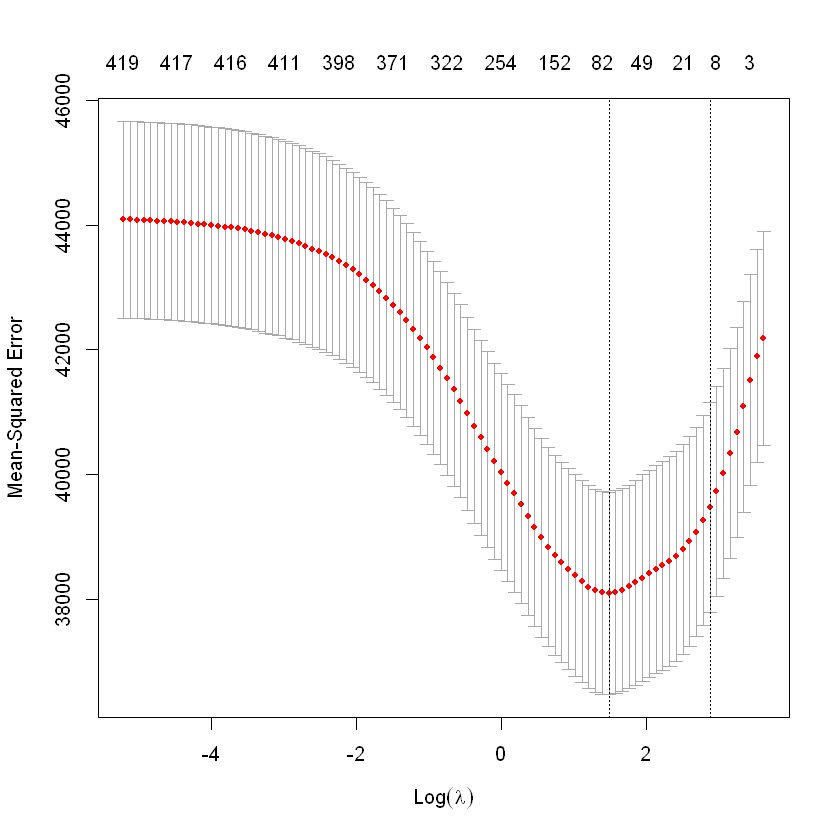

In [16]:
####################################################################
################# Cross-Validated Lasso ############################
####################################################################

set.seed(123456789) # Starting value

# Cross-validated Lasso in earnings equation
lasso_earn <- cv.glmnet(as.matrix(df_int[,c(3:ncol(df_int))]), as.matrix(df$EARNY4), 
                        alpha=1, nfolds = 10, type.measure = 'mse', standardize = TRUE)
# alpha =1 is Lasso, alpha = 0 is Ridgde
# nfolds - number of cross-validation folds
# type.measure - measure for model accuracy

plot(lasso_earn)

####################################################################

In [17]:
####################################################################

# Plot Lasso coefficients
coef(lasso_earn,s = lasso_earn$lambda.1se) 
# $lambda.min - Lambda that minimizes cross-validated MSE
# $lambda.1se - Lambda of 1 standard error rule

####################################################################

421 x 1 sparse Matrix of class "dgCMatrix"
                      1
(Intercept)  205.761212
female       -32.939275
age_1          .       
age_3          .       
ed0_6          .       
ed6_12         .       
hs_ged        10.473966
black        -16.599278
hisp           .       
oth_eth        .       
livespou       .       
everwork       .       
badhlth        .       
welf_kid       .       
got_fs         .       
potuse         .       
evarrst        .       
pmsa           .       
msa            .       
Inter.V1V2     .       
Inter.V1V3     .       
Inter.V1V4     .       
Inter.V1V5     .       
Inter.V1V6     .       
Inter.V1V7     .       
Inter.V1V8     .       
Inter.V1V9     .       
Inter.V1V10    .       
Inter.V1V11    .       
Inter.V1V14    .       
Inter.V1V15    .       
Inter.V1V16    .       
Inter.V1V17    .       
Inter.V1V18    .       
Inter.V1V19    .       
Inter.V1V20    .       
Inter.V1V21    .       
Inter.V1V22    .       
Inter.V1V23    .     

In [18]:
####################################################################

# Select covariates with non-zero coefficients
coef <- predict(lasso_earn,s = lasso_earn$lambda.min, type = "nonzero") #
colnames <- colnames(df_int[,c(3:ncol(df_int))])
n1 <- colnames[unlist(coef)]
print(paste0("Number of Selected Variables Earnings Equation: ",length(n1)))
print("Selected Variables:")
print(n1)

####################################################################

[1] "Number of Selected Variables Earnings Equation: 78"
[1] "Selected Variables:"
 [1] "female"       "hs_ged"       "black"        "everwork"     "badhlth"     
 [6] "potuse"       "Inter.V1V9"   "Inter.V1V18"  "Inter.V1V20"  "Inter.V1V23" 
[11] "Inter.V2V6"   "Inter.V2V7"   "Inter.V2V8"   "Inter.V2V14"  "Inter.V2V20" 
[16] "Inter.V2V26"  "Inter.V2V27"  "Inter.V2V30"  "Inter.V3V6"   "Inter.V3V11" 
[21] "Inter.V3V18"  "Inter.V3V20"  "Inter.V4V6"   "Inter.V4V10"  "Inter.V4V15" 
[26] "Inter.V4V22"  "Inter.V4V27"  "Inter.V5V17"  "Inter.V5V19"  "Inter.V5V27" 
[31] "Inter.V5V31"  "Inter.V6V7"   "Inter.V6V16"  "Inter.V6V21"  "Inter.V6V30" 
[36] "Inter.V7V25"  "Inter.V7V29"  "Inter.V7V30"  "Inter.V8V17"  "Inter.V8V18" 
[41] "Inter.V8V21"  "Inter.V8V23"  "Inter.V9V10"  "Inter.V9V14"  "Inter.V9V23" 
[46] "Inter.V9V26"  "Inter.V9V27"  "Inter.V9V28"  "Inter.V9V30"  "Inter.V10V16"
[51] "Inter.V10V19" "Inter.V10V21" "Inter.V10V29" "Inter.V10V30" "Inter.V11V16"
[56] "Inter.V11V21" "Inter.V11V28" "I

**Exercise:**

Select the relevant variables in the participation equation using a cross-validated Lasso.

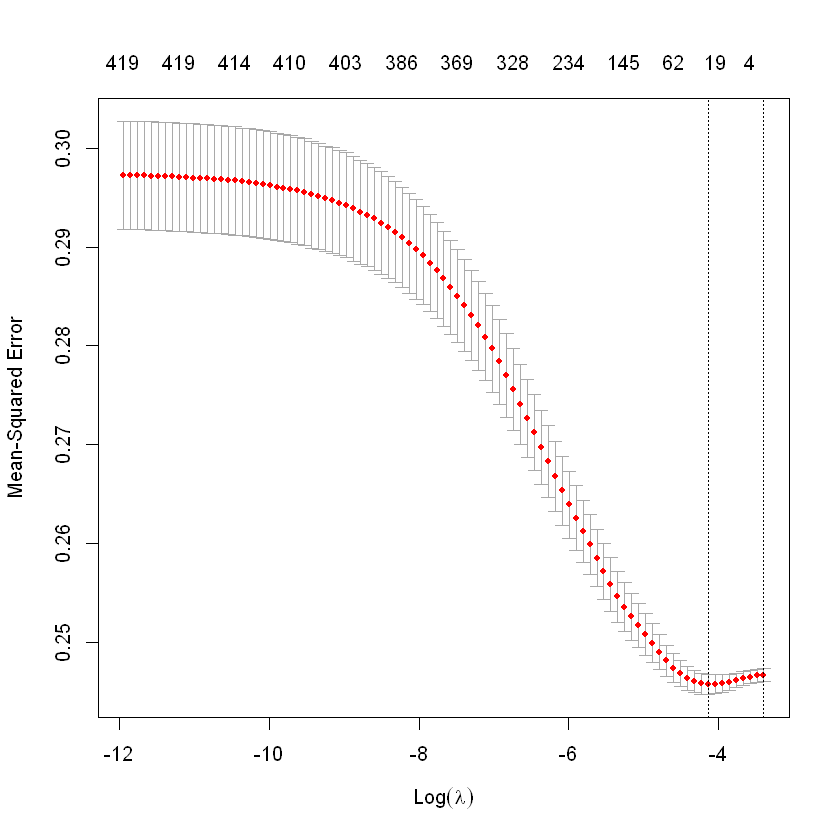

In [22]:
####################################################################

set.seed(123456789) # Starting value

# Cross-validated Lasso in participation equation
lasso_part <- cv.glmnet(as.matrix(df_int[,c(3:ncol(df_int))]), as.matrix(df$participation), 
                        alpha=1, nfolds = 10, type.measure = 'mse', standardize = TRUE)
plot(lasso_part)

####################################################################

In [24]:
####################################################################

# Select covariates with non-zero coefficients
coef <- predict(lasso_part,s = lasso_part$lambda.min, type = "nonzero") #
colnames <- colnames(df_int[,c(3:ncol(df_int))])
n2 <- colnames[unlist(coef)]
print(paste0("Number of Selected Variables Participation Equation: ",length(n2)))
print("Selected Variables:")
print(n2)

####################################################################

[1] "Number of Selected Variables Participation Equation: 24"
[1] "Selected Variables:"
 [1] "Inter.V1V2"   "Inter.V1V9"   "Inter.V2V7"   "Inter.V2V25"  "Inter.V3V4"  
 [6] "Inter.V3V10"  "Inter.V3V17"  "Inter.V4V5"   "Inter.V4V11"  "Inter.V4V20" 
[11] "Inter.V4V29"  "Inter.V4V31"  "Inter.V5V26"  "Inter.V6V28"  "Inter.V9V22" 
[16] "Inter.V11V17" "Inter.V11V21" "Inter.V15V23" "Inter.V19V28" "Inter.V19V29"
[21] "Inter.V20V27" "Inter.V20V30" "Inter.V21V30" "Inter.V24V25"


**Exercise:**

Take the union of variables with non-zero coefficients in either the earnings or participation equation. Estimate the effect of participation on earning controlling for the union of selected variables.

In [26]:
###############################################################################
# Post-Lasso Model
###############################################################################

# Take union of selected covariates
selected_covariates <- c("participation", unique(c(n1, n2)))

# Setup the formula of the linear regression model
sumx <- paste(selected_covariates, collapse = " + ")  
linear <- paste("EARNY4",paste(sumx, sep=" + "), sep=" ~ ")
linear <- as.formula(linear)

# Post-Lasso OLS regression
ols <- lm(linear, data = df_int)
summary(ols)

###############################################################################


Call:
lm(formula = linear, data = df_int)

Residuals:
    Min      1Q  Median      3Q     Max 
-511.28 -128.88  -23.90   92.92 1677.78 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    218.80638   12.28001  17.818  < 2e-16 ***
participation   20.72125    7.17460   2.888 0.003904 ** 
female         -61.31100   11.20325  -5.473 4.81e-08 ***
hs_ged         -26.27552   18.53056  -1.418 0.156311    
black          -35.83871   13.51715  -2.651 0.008061 ** 
everwork         9.21773   12.02832   0.766 0.443539    
badhlth          8.08855   20.62032   0.392 0.694894    
potuse         -12.99586   12.22145  -1.063 0.287705    
Inter.V1V9      -8.23635   26.59041  -0.310 0.756774    
Inter.V1V18    -24.71654   22.30324  -1.108 0.267866    
Inter.V1V20     10.49933   20.14330   0.521 0.602245    
Inter.V1V23     -4.79037   14.59134  -0.328 0.742707    
Inter.V2V6      78.14523   33.93048   2.303 0.021344 *  
Inter.V2V7     -17.49387   15.02489  -1.164 0.2443

**Exercises:**

1. Estimate the effect of participation on earnings using the one-standard-error rule to select the relevant charateristics with the Lasso.
2. Estimate the effect of participation on earnings using five instead of ten folds for the cross-validation procedure.